In [2]:
pip install yfinance

     |████████████████████████████████| 6.3MB 7.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=f66b155f93197f246fcaad34fc33452197aa7522d11525c13ec58be5419d5fe0
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-cp37-none-any.whl size=36083 sha256=38d92db1fcd3a3246993bb3704a9cc2ab24acf9a3d614f6360898619c8827d86
  Stored in directory: /root/.cache/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [4]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 
     |████████████████████████████████| 9.5MB 401kB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
from sklearn import *
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import *
from nsepy import get_history
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from pandas.util._decorators import Appender

In [6]:
# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2019-08-01')
print(data.head())
print()
cols = list(data.columns.values)
print(cols)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  24.364536  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.753977  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  23.289116  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  22.306208  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.424154  283192000

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


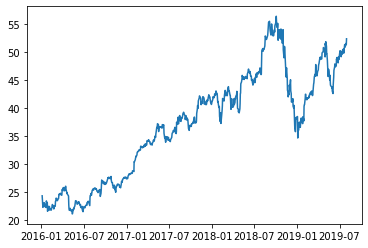

In [7]:
plt.plot(data['Adj Close'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


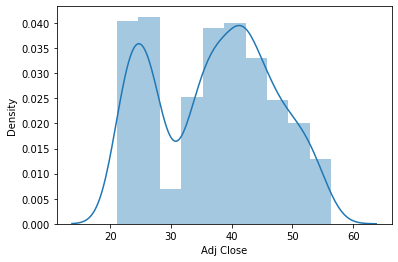

In [8]:
import seaborn as sns
sns.distplot(data["Adj Close"])

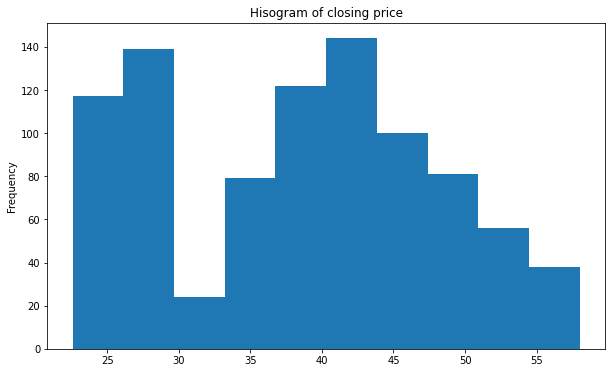

In [9]:
plt.figure(figsize=(10,6))
df_close = data['Close']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

In [10]:
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

df = yf.download(tickers_list,'2015-1-1')['Adj Close']

# Print first 5 rows of the data
print(df.head())
print()

[*********************100%***********************]  6 of 6 completed
                 AAPL        AXP          BA         IBM         MU        WMT
Date                                                                          
2015-01-02  24.861401  83.982346  113.657227  124.574829  34.750000  74.245743
2015-01-05  24.161013  81.761360  112.870056  122.614647  33.779999  74.029671
2015-01-06  24.163294  80.018860  111.540627  119.970337  32.869999  74.600113
2015-01-07  24.502111  81.766487  113.272369  119.186256  32.099998  76.579414
2015-01-08  25.443539  82.925537  115.275284  121.776733  33.669998  78.195717



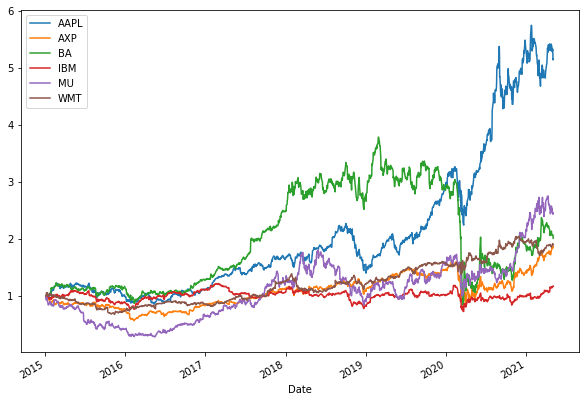

In [11]:
((df.pct_change()+1).cumprod()).plot(figsize=(10, 7))
plt.show()

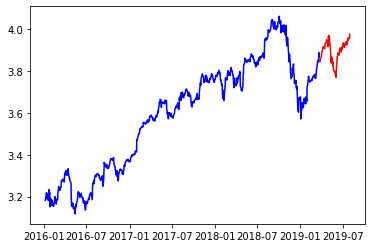

In [12]:
from datetime import date

df_log = np.log(data['Close'])
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.plot(train_data, color="blue")
plt.plot(test_data, color="red")
plt.show()

In [15]:
model_autoARIMA = auto_arima(train_data)
print(model_autoARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  807
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2220.178
Date:                Thu, 06 May 2021   AIC                          -4436.356
Time:                        08:09:22   BIC                          -4426.971
Sample:                             0   HQIC                         -4432.752
                                - 807                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.001      1.546      0.122      -0.000       0.002
sigma2         0.0002   6.08e-06     39.003      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.24   Jarque-

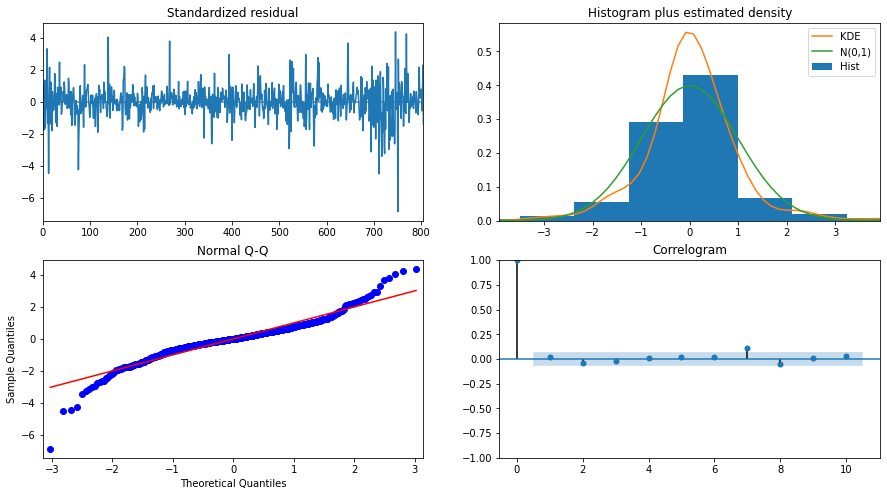

In [16]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()